In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline


In [7]:
iris = pd.read_csv("/Users/naveens/Desktop/SpringBoardCourseContent/datascience/excercise/Iris.csv")

In [6]:
iris.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [8]:
iris=iris.drop('Id',axis=1)

In [12]:
print(iris.shape) #no of row and col

(150, 6)


In [16]:
print(iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [17]:
iris['Species'].value_counts() #count of different Species

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

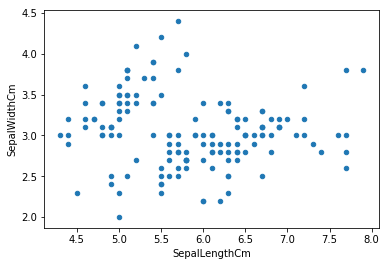

In [21]:
iris.plot(kind='scatter',x='SepalLengthCm', y='SepalWidthCm')
plt.show()

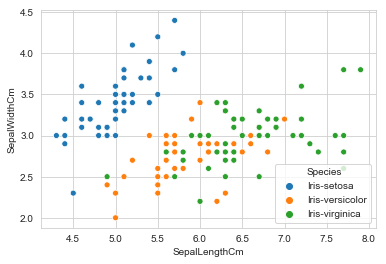

In [27]:
sns.set_style("whitegrid")
#sns.scatterplot(x=iris['SepalLengthCm'], y=iris['SepalWidthCm'],hue=iris['Species'])
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",data=iris,hue='Species')

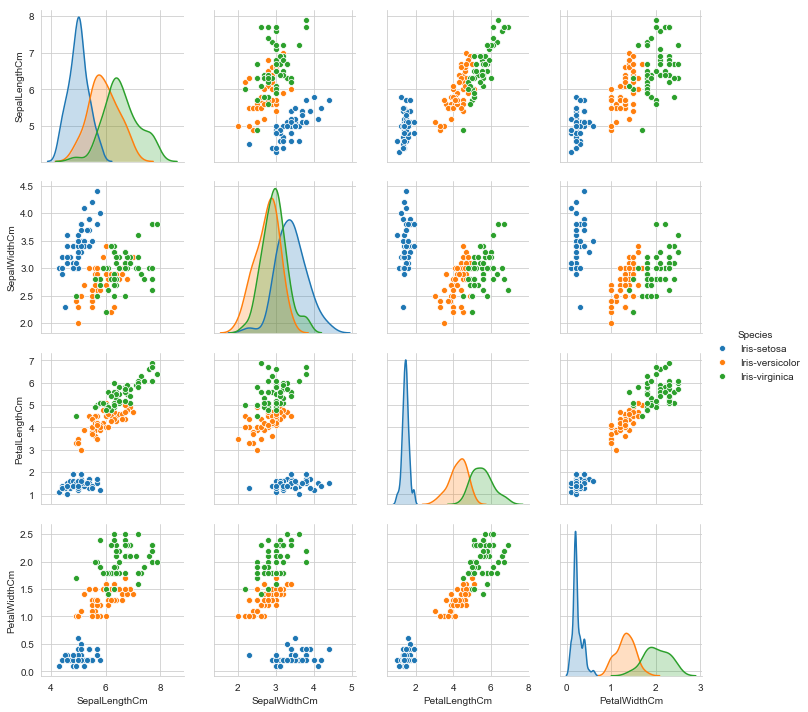

In [34]:
sns.pairplot(data=iris,hue='Species')    #Pair plot good in case of 2,3,4,5,6 Dimension 

In [12]:
iris_setosa = iris.loc[iris['Species']=='Iris-setosa']  #divide data in differnt dataframes
iris_virginica = iris.loc[iris['Species']=='Iris-virginica']
iris_versicolor = iris.loc[iris['Species']=='Iris-versicolor']


In [45]:
iris_setosa.head()
#print(sum(iris_setosa['PetalLengthCm']))
#print(iris_setosa['PetalLengthCm'])

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [61]:
counts,bins_edges = np.histogram(iris_setosa['PetalLengthCm'],bins=10,density=True)
pdf = counts/(sum(counts))    #Probability function
print(pdf)
print(bins_edges)

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


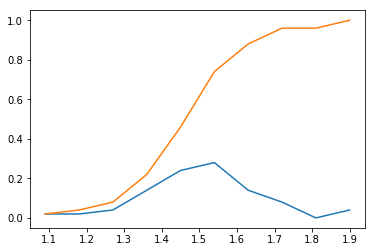

In [64]:
cdf = np.cumsum(pdf)  #Calulate Cumulative Distribution Function
plt.plot(bins_edges[1:],pdf)
plt.plot(bins_edges[1:],cdf)
plt.show()

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


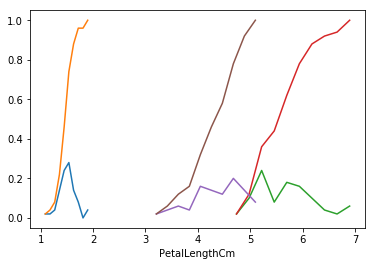

In [67]:
#Setosa
counts,bins_edges = np.histogram(iris_setosa['PetalLengthCm'],bins=10,density=True)
pdf = counts/(sum(counts))    #Probability function
print(pdf)
print(bins_edges)
cdf = np.cumsum(pdf)  #Calulate Cumulative Distribution Function
plt.plot(bins_edges[1:],pdf)
plt.plot(bins_edges[1:],cdf)

counts,bins_edges = np.histogram(iris_virginica['PetalLengthCm'],bins=10,density=True)
pdf = counts/(sum(counts))    #Probability function
print(pdf)
print(bins_edges)
cdf = np.cumsum(pdf)  #Calulate Cumulative Distribution Function
plt.plot(bins_edges[1:],pdf)
plt.plot(bins_edges[1:],cdf)



counts,bins_edges = np.histogram(iris_versicolor['PetalLengthCm'],bins=10,density=True)
pdf = counts/(sum(counts))    #Probability function
print(pdf)
print(bins_edges)
cdf = np.cumsum(pdf)  #Calulate Cumulative Distribution Function
plt.plot(bins_edges[1:],pdf)      #
plt.plot(bins_edges[1:],cdf)
plt.xlabel("PetalLengthCm")
plt.xlabel("PetalLengthCm")
plt.show()



In [77]:
#Mean , Stad-Dev  (They have problem if are/is there any outliers/outlier)

print("Means")  #Average behaviour

print(np.mean(iris_setosa['PetalLengthCm']))
print(np.mean(np.append(iris_setosa['PetalLengthCm'],50)))  #mean with outlier
print(np.mean(iris_virginica['PetalLengthCm']))
print(np.mean(iris_versicolor['PetalLengthCm']))



print("\nStandard Dev")

print(np.std(iris_setosa['PetalLengthCm']))
print(np.std(iris_virginica['PetalLengthCm']))
print(np.std(iris_versicolor['PetalLengthCm']))

Means
1.464
2.4156862745098038
5.552
4.26

Standard Dev
0.17176728442867115
0.5463478745268441
0.4651881339845204


In [12]:
#Median , Quantiles, Percentiles, IQR

print(np.median(iris_setosa['PetalLengthCm']))
print(np.median(np.append(iris_setosa['PetalLengthCm'],50)))  #median with outlier
print(np.median(iris_virginica['PetalLengthCm']))
print(np.median(iris_versicolor['PetalLengthCm']))


# Quantiles
print("\n Quantiles")
print(np.percentile(iris_setosa['PetalLengthCm'],np.arange(0,100,25)))
print(np.percentile(iris_virginica['PetalLengthCm'],np.arange(0,100,25)))
print(np.percentile(iris_versicolor['PetalLengthCm'],np.arange(0,100,25)))


# Percentiles
print("\n Percentiles")
print(np.percentile(iris_setosa['PetalLengthCm'],90))
print(np.percentile(iris_virginica['PetalLengthCm'],90))
print(np.percentile(iris_versicolor['PetalLengthCm'],90))




1.5
1.5
5.55
4.35

 Quantiles
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

 Percentiles
1.7
6.3100000000000005
4.8


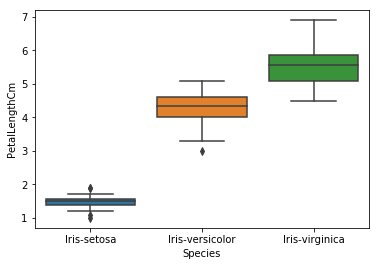

In [18]:
sns.boxplot(x='Species',y='PetalLengthCm', data=iris)
plt.show()

#Vertical lines are Wiskers  (We can draw it with min and max value)
                             #(seaboan uses 1.5* IQR)  IQR is with of box (25%,50% 75%)

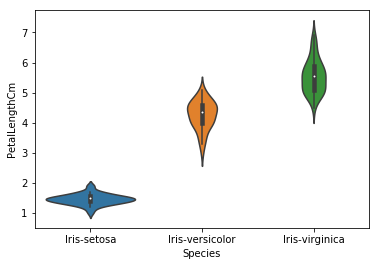

In [10]:
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.show()

#inside this violine we can see box plot and wiskers : inside these violine fat line is box plot and thinner line 
#is wisker

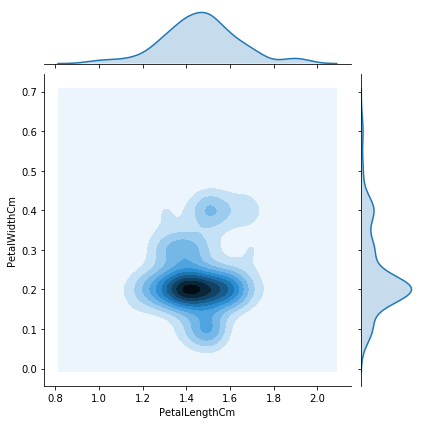

In [14]:
#contour density plot  (We have to visualize this as 3rd plot. The darker part the top of the hill 
# and the points on ripples are denoting having same height)

#1D density is PDF plot
#2D density is Contour plot
sns.jointplot(x='PetalLengthCm',y='PetalWidthCm',data=iris_setosa,kind='kde')
plt.show()